In [38]:
#bibliotecas necessárias

import pandas as pd
import numpy as np

#visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [60]:
#para fazer separamento de treinamento e teste
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [40]:
# Base de dados wine

wine = pd.read_csv('wine.csv')

In [6]:
#Análise exploratória e visualização de dados

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [9]:
wine['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

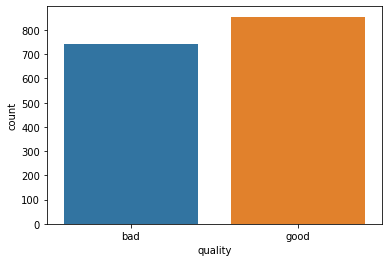

In [10]:
sns.countplot(data=wine, x='quality')

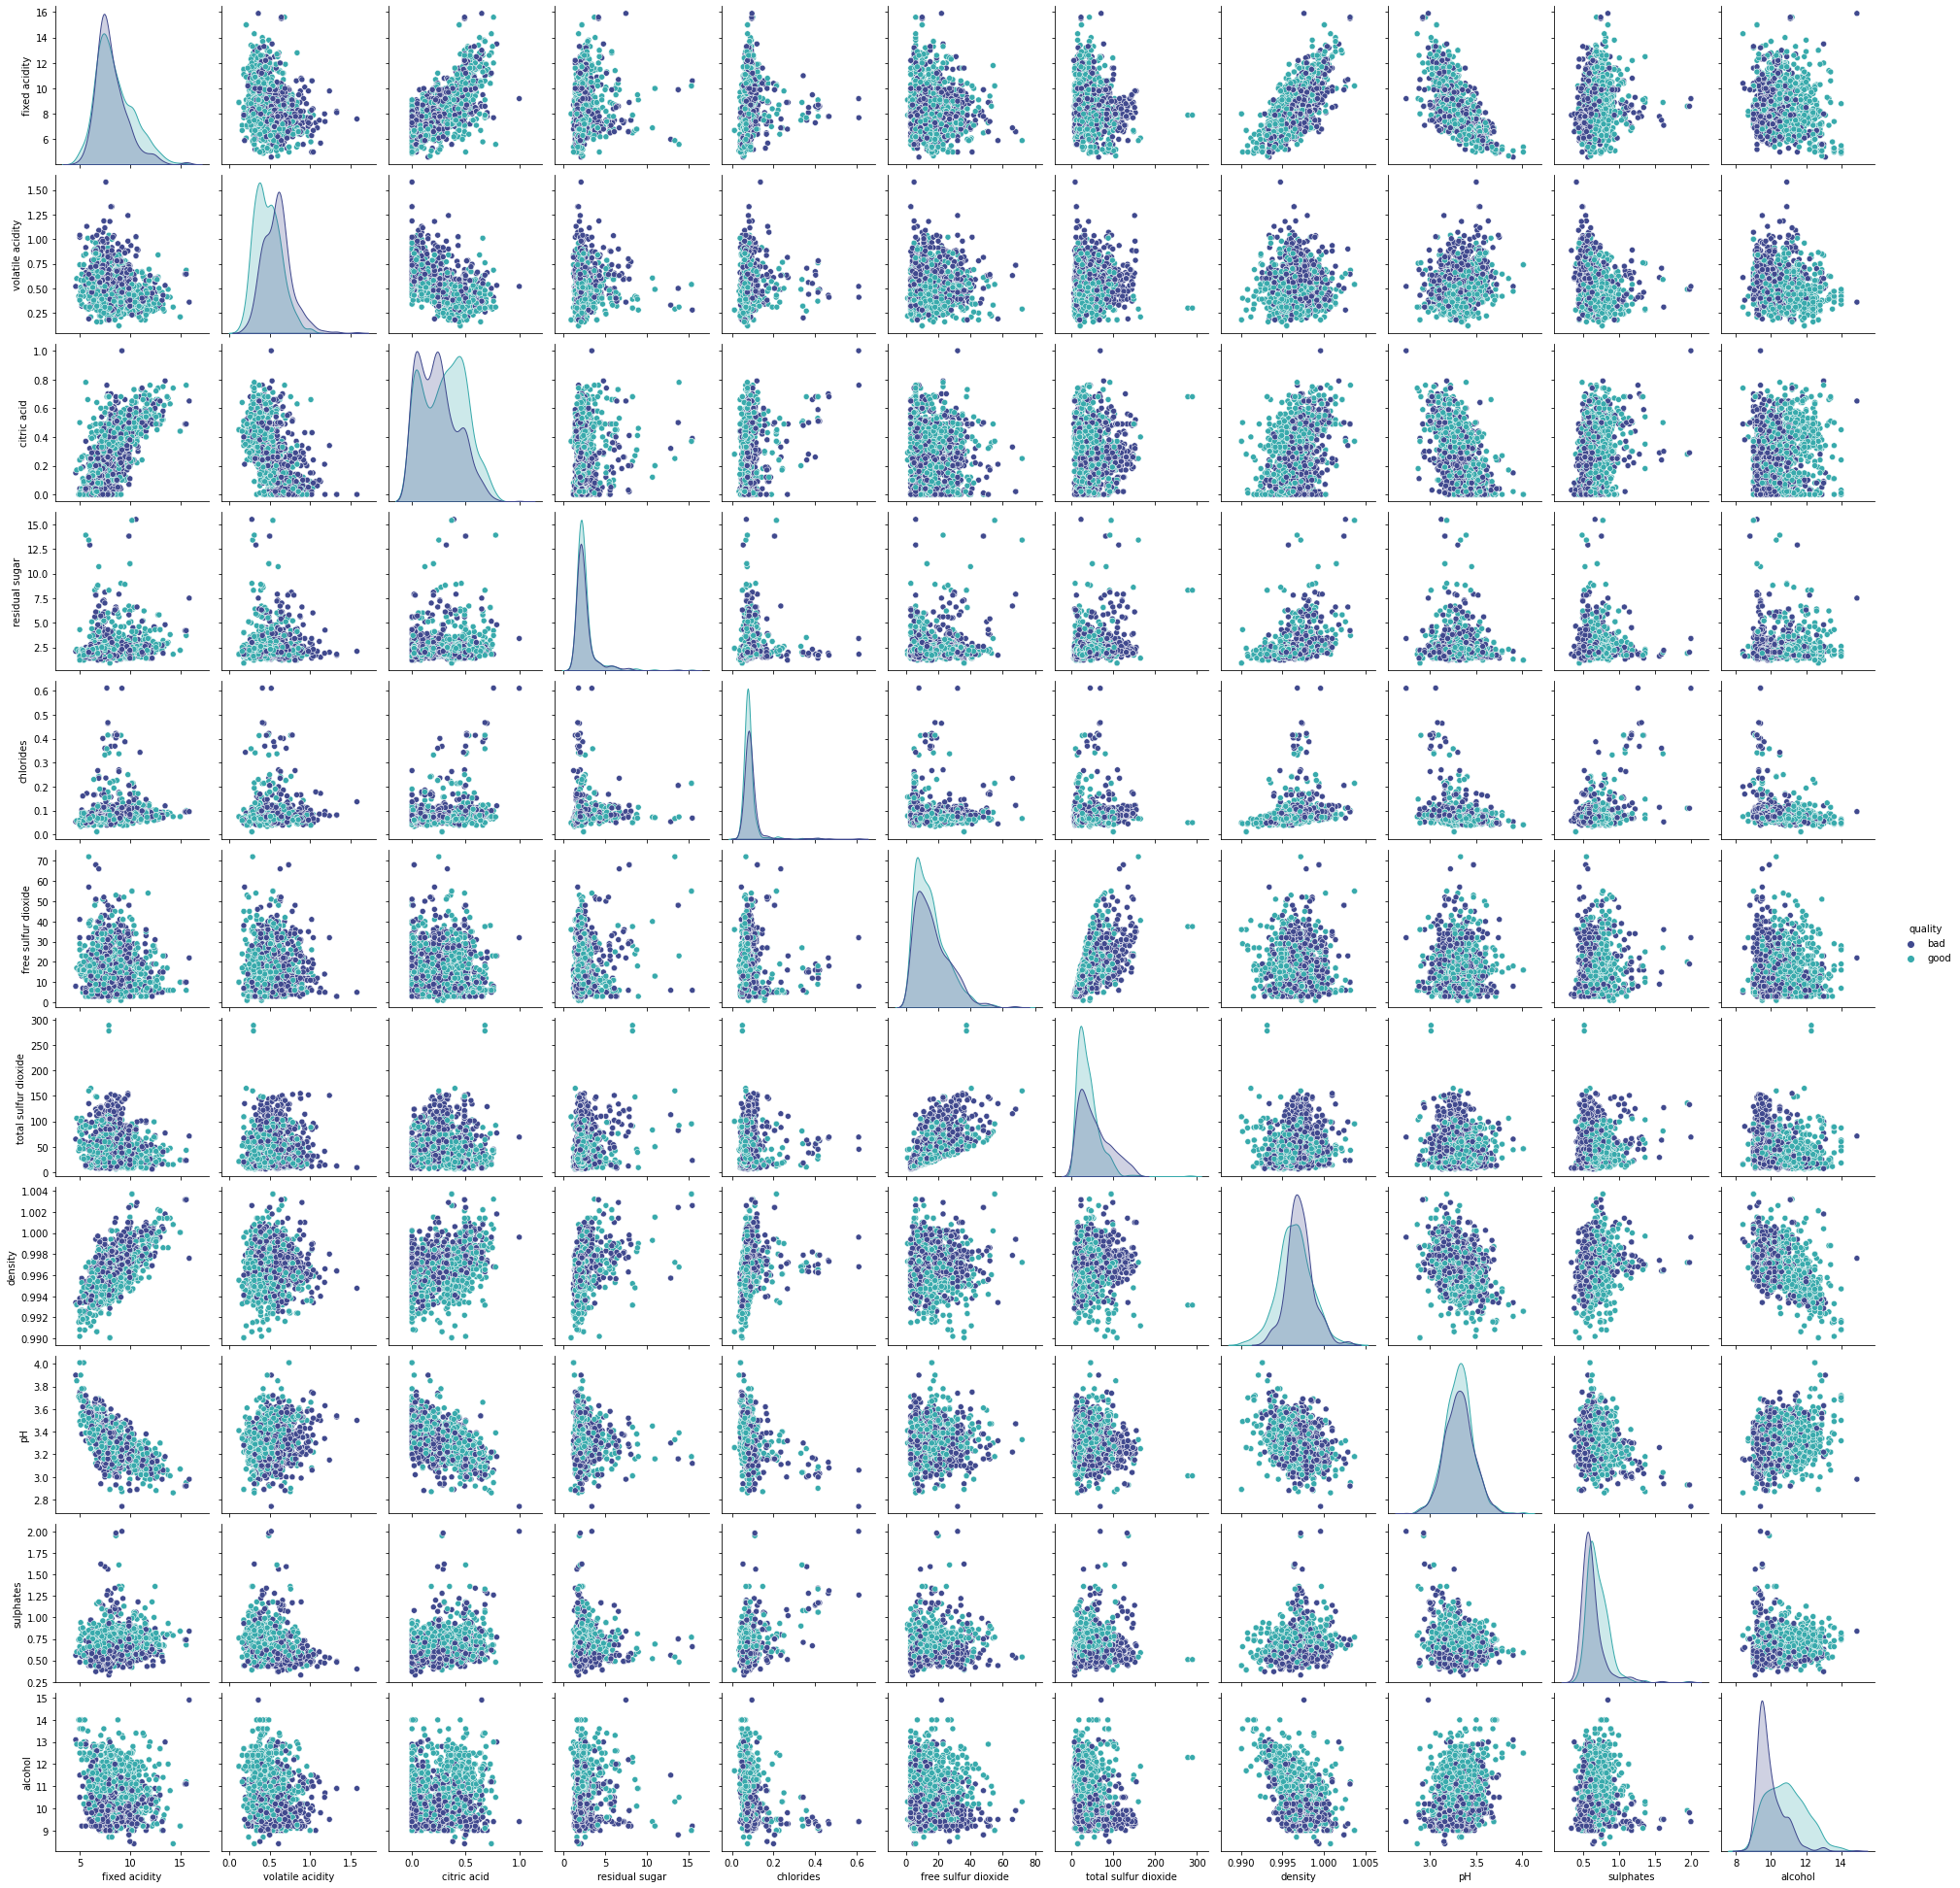

In [11]:
sns.pairplot(data=wine, hue='quality', palette='mako')

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

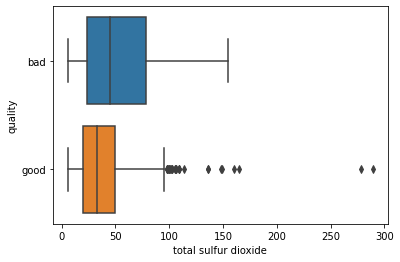

In [12]:
sns.boxplot(data=wine, y='quality', x='total sulfur dioxide')

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

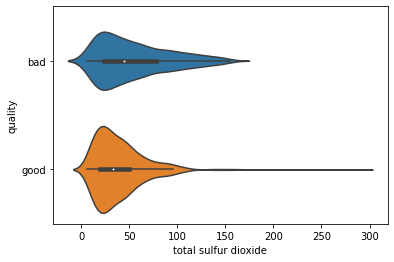

In [13]:
sns.violinplot(data=wine, y='quality', x='total sulfur dioxide')

In [14]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


<AxesSubplot:>

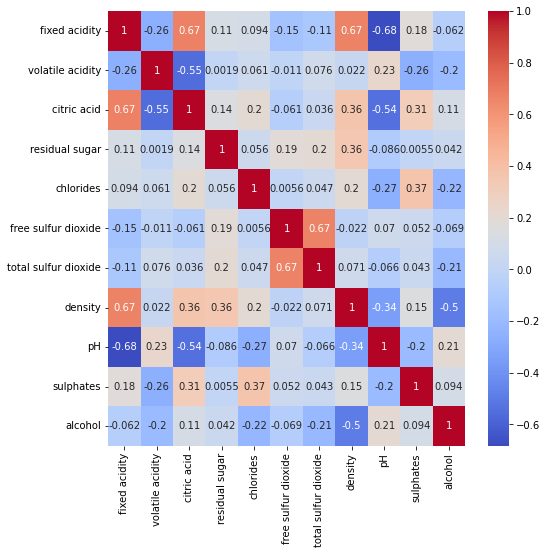

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(data=wine.corr(), annot=True, cmap='coolwarm')

In [16]:
#Treino e teste
X = wine.drop('quality', axis=1)
y = wine['quality']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=5)

In [18]:
X_test.shape

(480, 11)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1119, 11)
(1119,)
(480, 11)
(480,)


In [20]:
# treinando o modelo

lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [21]:
# Avaliando os resultados

y_pred = lr.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred)) #classificação

              precision    recall  f1-score   support

         bad       0.72      0.80      0.76       227
        good       0.80      0.72      0.76       253

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480



In [23]:
confusion_matrix(y_test, y_pred)#matriz de confusão

array([[182,  45],
       [ 72, 181]], dtype=int64)

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
y_pred = knn.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.67      0.70      0.69       227
        good       0.72      0.68      0.70       253

    accuracy                           0.69       480
   macro avg       0.69      0.69      0.69       480
weighted avg       0.70      0.69      0.69       480



In [27]:
confusion_matrix(y_test, y_pred)

array([[160,  67],
       [ 80, 173]], dtype=int64)

In [28]:
#metodo do cotovelo
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error')

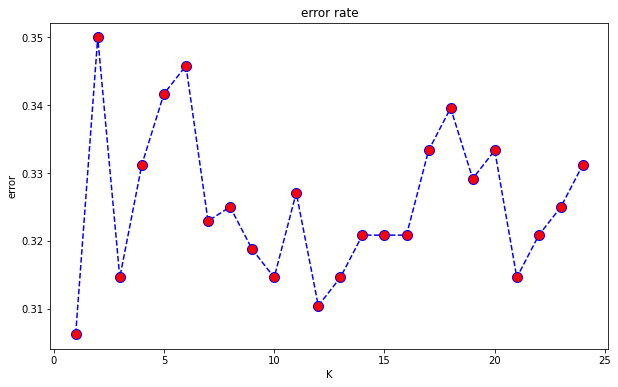

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),
        error_rate,
        color='blue',
        linestyle='dashed',
        marker='o',
        markerfacecolor='red',
        markersize=10)

plt.title('error rate')
plt.xlabel('K')
plt.ylabel('error')

In [30]:
svc = SVC(C=100)
svc.fit(X_train, y_train)

SVC(C=100)

In [31]:
y_pred = svc.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.71      0.80      0.75       227
        good       0.80      0.71      0.75       253

    accuracy                           0.75       480
   macro avg       0.76      0.75      0.75       480
weighted avg       0.76      0.75      0.75       480



In [33]:
confusion_matrix(y_test, y_pred)

array([[182,  45],
       [ 74, 179]], dtype=int64)

In [34]:
rf = RandomForestClassifier(max_depth=100, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=1)

In [35]:
y_pred = rf.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.80      0.81      0.81       227
        good       0.83      0.82      0.83       253

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480



In [37]:
confusion_matrix(y_test, y_pred)

array([[184,  43],
       [ 45, 208]], dtype=int64)

In [61]:
# Base de Dados Iris

iris = pd.read_csv('iris.csv')

In [62]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [64]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [65]:
iris['class']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [66]:
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

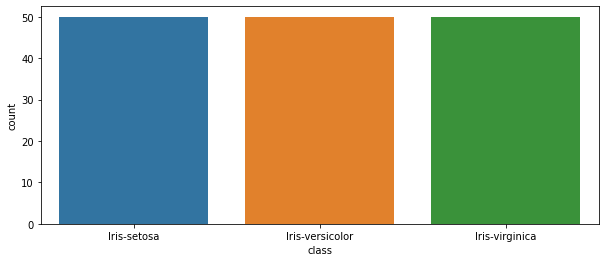

In [68]:
plt.figure(figsize=(10,4)) #para definir o tamanho do gráfico
sns.countplot(data=iris, x=iris['class'])

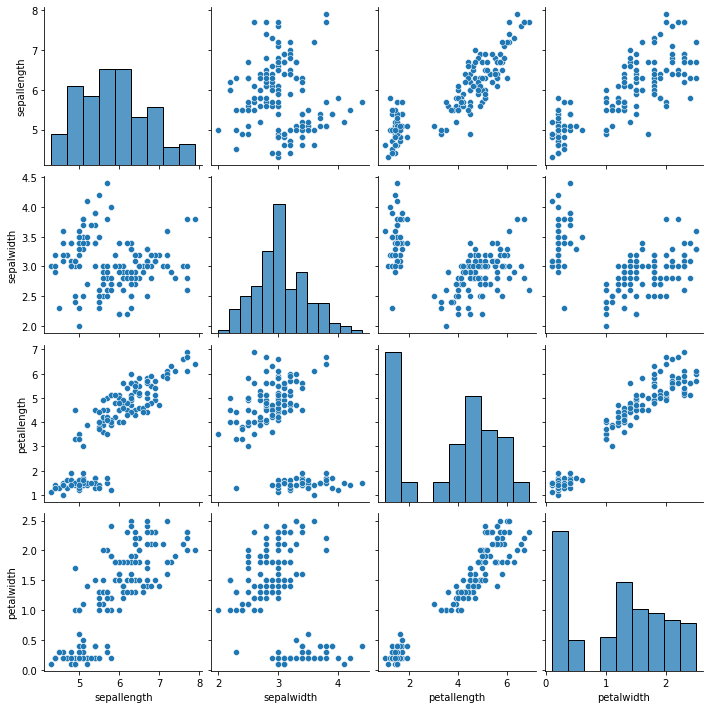

In [69]:
sns.pairplot(iris)

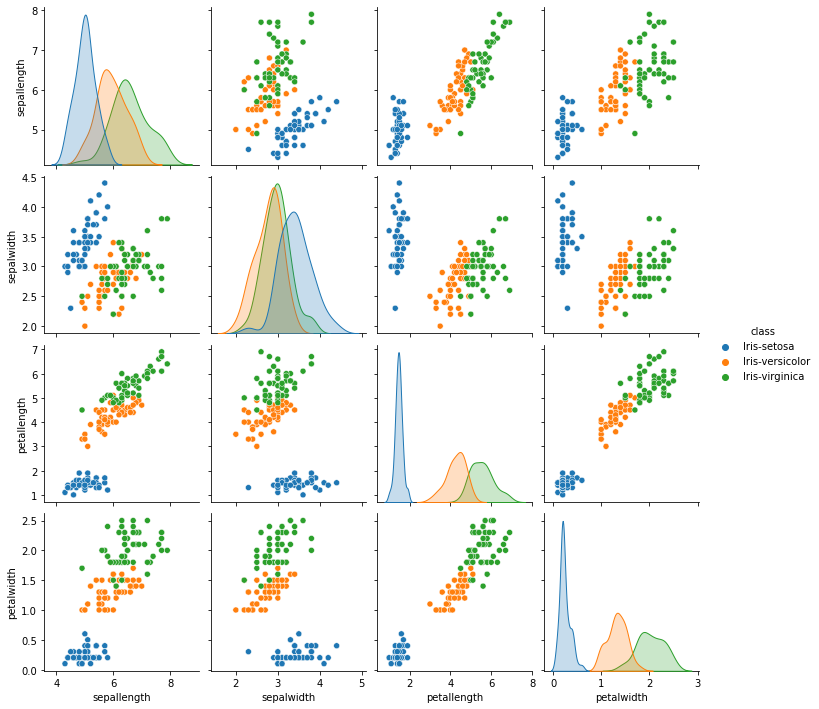

In [71]:
sns.pairplot(data=iris, hue='class')#para separar por cores

<AxesSubplot:xlabel='petallength', ylabel='class'>

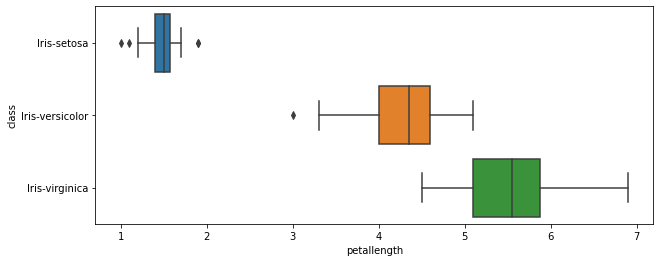

In [72]:
plt.figure(figsize=(10,4))
sns.boxplot(data=iris, x='petallength', y='class')

<AxesSubplot:xlabel='petallength', ylabel='class'>

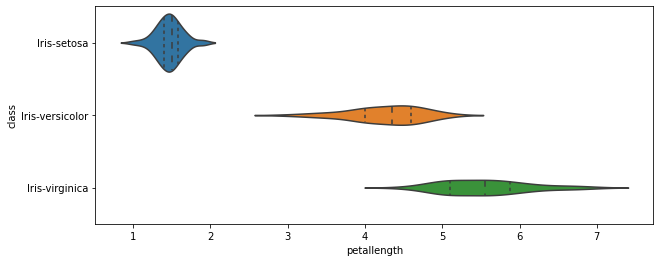

In [73]:
plt.figure(figsize=(10,4))
sns.violinplot(data=iris, x='petallength', y='class', inner='quartile')

In [75]:
iris.corr()#matriz de correlação

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

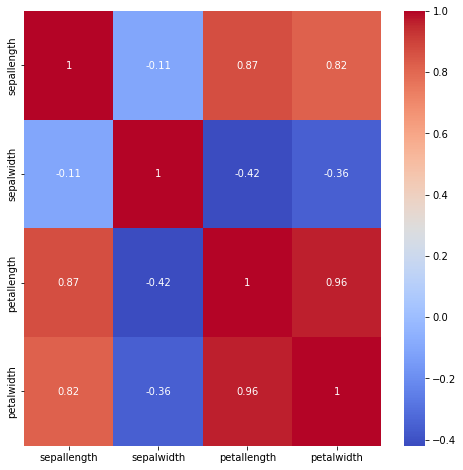

In [76]:
plt.figure(figsize=(8,8))
sns.heatmap(data=iris.corr(), annot=True, cmap='coolwarm')#mapa de calor da correlação

In [77]:
# Separando treino e teste

iris.iloc[:,0:4]

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [78]:
iris.drop('class', axis=1)


,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [79]:
X = iris.drop('class', axis=1)
y = iris['class']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    random_state=42)

In [84]:
X_test.shape

(45, 4)

In [83]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [85]:
#Treinando o modelo

lr = LogisticRegression(C=0.001, verbose=True, random_state=1)

In [86]:
lr.fit(X_train, y_train)#aplicar os modelos dos dados

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.001, random_state=1, verbose=True)

In [87]:
#Prevendo valores e avaliando resultados

y_pred = lr.predict(X_test)

In [88]:
d = {'real': y_test, 'pred': y_pred}
pd.DataFrame(d)

,real,pred
73,Iris-versicolor,Iris-virginica
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-virginica
76,Iris-versicolor,Iris-virginica
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-virginica
82,Iris-versicolor,Iris-versicolor


In [89]:
print(classification_report(y_test, y_pred)) #classificação

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.23      0.38        13
 Iris-virginica       0.57      1.00      0.72        13

       accuracy                           0.78        45
      macro avg       0.86      0.74      0.70        45
   weighted avg       0.87      0.78      0.74        45



In [90]:
confusion_matrix(y_test, y_pred)#matriz de confusão

array([[19,  0,  0],
       [ 0,  3, 10],
       [ 0,  0, 13]], dtype=int64)

In [91]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [92]:
y_pred = knn.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [94]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)